In [24]:
import numpy as np
import pandas as pd
import os
import librosa
import scipy
from scipy.stats import skew
from tqdm import tqdm, tqdm_pandas
tqdm.pandas()
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')




# Load and split Data

In [25]:
# Load MFCC data and labels
X_train = np.load('mfcc/MFCC_data.npy')
y_train = np.load('mfcc/language_dummy.npy')
X_test = np.load('mfcc/MFCC_data_t.npy')
y_test = np.load('mfcc/language_dummy_t.npy')

# Define the number of classes (replace with the actual number)
num_classes = 3  # Change this to the number of classes in your dataset

# Assuming language_dummy.npy contains the class labels as one-hot encoded vectors
# Convert one-hot encoded labels to class indices
y_train = np.argmax(y_train, axis=1)

# Reshape MFCC data to be 2D
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to 2D
X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten to 2D

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Do PCA

In [26]:
# Standardize the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

# Perform PCA
n_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

# Normal Model

In [27]:
clf = SVC(kernel='rbf', probability=True, verbose=True)
clf.fit(X_train, y_train)

print(accuracy_score(clf.predict(X_val), y_val))

[LibSVM]0.4334470989761092


# do Grid Search for best Hyperparameters and Train

In [28]:
# Define the paramter grid for C from 0.001 to 10, gamma from 0.001 to 10
C_grid = [0.001, 0.01, 0.1, 1, 10]
gamma_grid = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': C_grid, 'gamma' : gamma_grid}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 3, scoring = "accuracy")
grid.fit(X_train, y_train)

# Find the best model
print(grid.best_score_)

print(grid.best_params_)

print(grid.best_estimator_)

0.34674928042537295
{'C': 10, 'gamma': 0.001}
SVC(C=10, gamma=0.001)


In [5]:
# Optimal model
clf = SVC(kernel = 'rbf', C = 10, gamma = 0.001, probability=True, verbose=True)
clf.fit(X_train, y_train)

print(accuracy_score(clf.predict(X_val), y_val))

[LibSVM]0.3003412969283277


# Train model with PCA

In [23]:
# Train the SVM classifier on the PCA-transformed data
clf = SVC(kernel='rbf', probability=True, verbose=True)
clf.fit(X_train_pca, y_train)

# Predict classes for the PCA-transformed test data
y_pred_test = clf.predict(X_test_pca)

# Write the predictions to an output CSV file
subm = pd.DataFrame()
subm['fname'] = audio_test_files  # Make sure you have audio_test_files defined
subm['label'] = y_pred_test  # Assuming y_pred_test contains the predicted labels
subm.to_csv('submission.csv', index=False)

NameError: name 'X_train_pca' is not defined

# Save Results

Validation Accuracy: 43.34%
Classification Report:
              precision    recall  f1-score   support

           0    0.40000   0.38000   0.38974       100
           1    0.39823   0.51136   0.44776        88
           2    0.51765   0.41905   0.46316       105

    accuracy                        0.43345       293
   macro avg    0.43863   0.43680   0.43355       293
weighted avg    0.44163   0.43345   0.43348       293

Saved classification report to ./exp/SVM_3\report_classification.csv


C:\Users\kuric\AppData\Local\Temp\ipykernel_32980\1851504350.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=Column), ignore_index=True)
C:\Users\kuric\AppData\Local\Temp\ipykernel_32980\1851504350.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=Column), ignore_index=True)
C:\Users\kuric\AppData\Local\Temp\ipykernel_32980\1851504350.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame([row], columns=Column), ignore_index=True)
C:\Users\kuric\AppData\Local\Temp\ipykernel_32980\1851504350.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pa

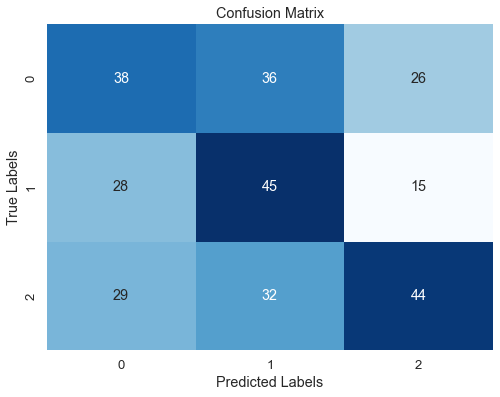

In [14]:



def report_to_list(rep):
    if type(rep) == str:
        lines = rep.split('\n')
        values = [line.split()[0:] for line in lines[0:]]
        values = [item for item in values if item]
        values = [item for item in values if item]

        for i in range(0,len(values)):
            if(i==0):
                values[i].insert(0, '')
            elif(i>len(values)-2-1):
                values[i][0] = ' '.join(values[i][0:2])
                del values[i][1]
            elif(i>len(values)-3-1):
                values[i].insert(1, '')
                values[i].insert(1, '')

            else:
                values[i][0] = i-1

        return values
    else:
        print("report must be str")
        return rep

# Predict classes for the validation set
y_pred_val = clf.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_val, y_pred_val, digits=5)
print("Classification Report:")
print(classification_rep)
classification_df = report_to_list(classification_rep)
Column = classification_df[0]
Column[0] = "Model Reports"
results = pd.DataFrame(columns = classification_df[0])
i=0
for row in classification_df:
    i=i+1
    if(i==1):
        next
    results = results.append(pd.DataFrame([row], columns=Column), ignore_index=True)

results = results.append(pd.DataFrame([[" ", " ", " ", " ", " "]], columns=Column), ignore_index=True)

# Determine the next available experiment number
exp_number = 1
while os.path.exists(f"./exp/SVM_{exp_number}"):
    exp_number += 1

# Create a directory for the experiment
exp_directory = f"./exp/SVM_{exp_number}"
os.makedirs(exp_directory)

# Save the classification report to a CSV file within the experiment directory
report_filename = os.path.join(exp_directory, "report_classification.csv")
results.to_csv(report_filename, index=False)
print(f"Saved classification report to {report_filename}")




# Calculate and print the confusion matrix
confusion_mat = confusion_matrix(y_val, y_pred_val)

# Create a heatmap of the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(exp_directory, "confusion_matrix.png"))
plt.show()



